# 텐서플로 첫걸음

## 01. TensorFlow

### 01) Multiply

In [1]:
import tensorflow as tf

In [2]:
a = tf.placeholder("float32")
b = tf.placeholder("float32")

In [3]:
# 텐서플로 모듈을 통한 연산
y=tf.multiply(a,b)  

In [4]:
# TensorFlow를 활성화
sess = tf.Session()
sess.run(y, feed_dict = {a:3, b:3})

9.0

### 02) Monitering

In [5]:
# tensorboard --logdir= 추적 파일 디렉토리
# http://localhost:6006   # 모니터링 화면이 출력 

## 02. Liner Regression
- supervised Learning : 지도학습 (입력값, 출력값을 활용한 함수의 상수값 도출)

### 01) 변수간의 관계 모델

In [6]:
import numpy as np

In [7]:
num_points = 1000
vector_set = []

In [8]:
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vector_set.append([x1, y1])

In [9]:
x_data = [v[0] for v in vector_set]
y_data = [v[0] for v in vector_set]

/home/markbaum/Python/Jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


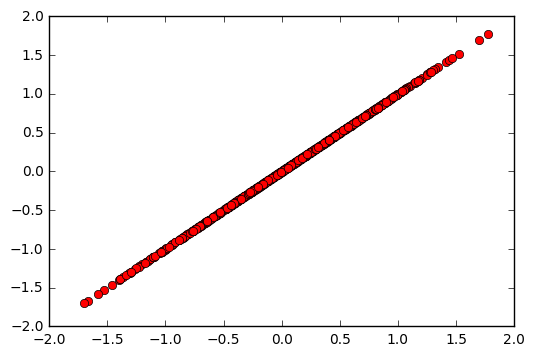

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'ro')
plt.legend()
plt.show()

### 02) 경사하강법 알고리즘
- 가설모델
- 비용함수 / 오차함수 : 평균제곱오차

In [11]:
import tensorflow as tf
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [12]:
# 비용함수
loss = tf.reduce_mean(tf.square(y - y_data))

In [13]:
# 경사하강법 알고리즘을 활용
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [14]:
# 알고리즘을 실행
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
# Tensorflow 엔진을 활용
for step in range(8):
    sess.run(train)
sess.run([W,b])

[array([ 0.99595946], dtype=float32), array([ 0.00013505], dtype=float32)]

/home/markbaum/Python/Jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


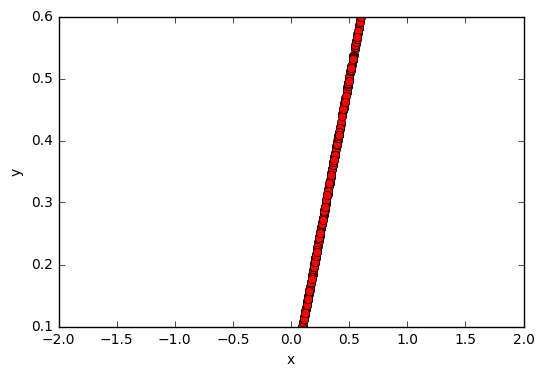

In [16]:
# Graph로 출력
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'ro')
plt.xlabel('x')
plt.xlim(-2,2)
plt.ylim(0.1, 0.6)
plt.ylabel('y')
plt.legend()
plt.show()

In [17]:
for step in range(9):
    sess.run(train)
    print(step, "  W :  ",sess.run(W), "  bias :  ", sess.run(b))

0   W :   [ 0.99720609]   bias :   [  9.33781994e-05]
1   W :   [ 0.99806809]   bias :   [  6.45711043e-05]
2   W :   [ 0.99866414]   bias :   [  4.46505328e-05]
3   W :   [ 0.99907631]   bias :   [  3.08747949e-05]
4   W :   [ 0.99936128]   bias :   [  2.13484636e-05]
5   W :   [ 0.99955833]   bias :   [  1.47685487e-05]
6   W :   [ 0.99969459]   bias :   [  1.02007562e-05]
7   W :   [ 0.99978882]   bias :   [  7.05795446e-06]
8   W :   [ 0.99985397]   bias :   [  4.88609339e-06]


## 03. 군집화
- unsupervised Learning : 데이터에 레이블이 없을 떄, 사전분류
- K-평균 알고리즘

### 01) Tensor : 분석할 자료 데이터
- 자료형 : tf.float32 / tf.int16 / tf.string / tf.bool ......
- 변환함수 : tf.shape / tf.size / tf.concat ......

In [18]:
t = [[1,2,3], [4,5,6], [7,8,9]]
points = t

In [19]:
# 2차원 자료를 3차원으로 확장
vector = tf.constant(points)
expanded_vectors = tf.expand_dims(vector, 0)

In [20]:
# 자료의 형태를 확인 (확장결과 확인)
expanded_vectors.get_shape()

TensorShape([Dimension(1), Dimension(3), Dimension(3)])

### 02) 텐서플로 데이터 저장소

In [21]:
# tf.constant()
# tf.variable()

In [22]:
# tf.zeros_like
# tf.ones_like
# tf.fill
# tf.constant

In [23]:
# tf.random_normal
# tf.truncated_normal
# tf.set_random_seed

In [24]:
import tensorflow as tf
a = tf.placeholder("float32")
b = tf.placeholder("float32")

In [25]:
y = tf.multiply(a,b)

In [26]:
sess = tf.Session()
sess.run(y, feed_dict={a:3, b:3})

9.0

### 03) K-평균 알고리즘
- 자료를 K 갯수로 군집화
- NP함수를 활용 : NP hardness (난해해서 부하가 많이 걸린다)
- Heuristics 방법이 효과적 (반복개선기법 (iterative refinement))

In [27]:
import numpy as np

In [28]:
num_points = 2000
vector_set = []

In [29]:
for i in range(num_points):
    if np.random.random() > 0.5:
        vector_set.append([np.random.normal(0.0, 0.9),
                          np.random.normal(0.0, 0.9)])
    else:
        vector_set.append([np.random.normal(3.0, 5.0),
                          np.random.normal(1.0, 0.5)])

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

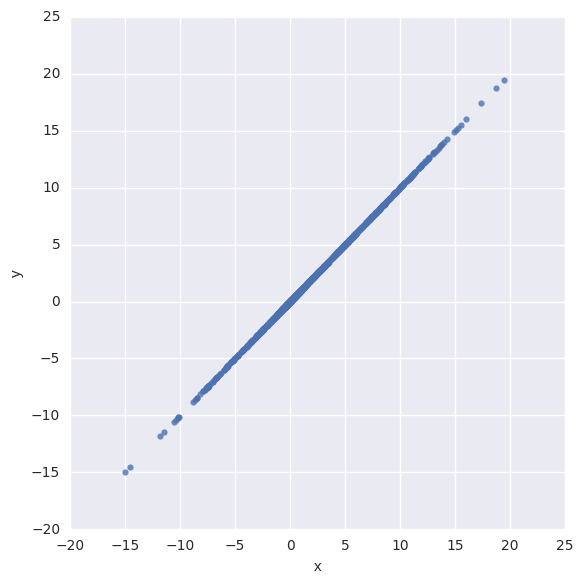

In [31]:
df = pd.DataFrame({"x": [v[0] for v in vector_set],
                   "y": [v[0] for v in vector_set]})
sns.lmplot("x","y", data=df, fit_reg=False, size=6)
plt.show()

### 04) 새로운 그룹

In [37]:
# 01. 입력된 자료를 Tensor로 이동
vectors = tf.constant(vector_set)
vectors.get_shape()
# 0차원의 크기, 1차원의 크기 ( index 2000 개 X columns 2인 Table )

TensorShape([Dimension(2000), Dimension(2)])

In [38]:
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k,-1]))
centroides.get_shape()
# ( index 4 개 X columns 2 인 Table )

TensorShape([Dimension(4), Dimension(2)])

In [43]:
# 02. 두 텐서에 각각 하나의 차원을 추가한다.
# Numpy BroadCasting
# 추가된 차원에 1만 추가되어도. 차원에 맞게 계산을 반복 ( 연산결과 차원이 확장이 완성된다 )
expanded_vectors = tf.expand_dims(vectors,0)
expanded_vectors 

<tf.Tensor 'ExpandDims_5:0' shape=(1, 2000, 2) dtype=float32>

In [42]:
expanded_centroide = tf.expand_dims(centroides, 1)
expanded_centroide

<tf.Tensor 'ExpandDims_4:0' shape=(4, 1, 2) dtype=float32>

In [46]:
# 유클리드 제곱거리를 사용하는 할당단계 알고리즘 01
diff = tf.subtract(expanded_vectors, expanded_centroide)
sqr = tf.square(diff)
distances = tf.reduce_sum(sqr,2)
assignments = tf.argmin(distances,0)

In [50]:
print('diff        : ', diff); print('sqr         : ', sqr)
print('distances   : ', distances); print('assignments : ', assignments)

diff        :  Tensor("Sub_1:0", shape=(4, 2000, 2), dtype=float32)
sqr         :  Tensor("Square_2:0", shape=(4, 2000, 2), dtype=float32)
distances   :  Tensor("Sum:0", shape=(4, 2000), dtype=float32)
assignments :  Tensor("ArgMin_1:0", shape=(2000,), dtype=int64)


In [51]:
# 유클리드 제곱거리를 사용하는 할당단계 알고리즘 02
assignments = tf.argmin(tf.reduce_mean(tf.square(tf.subtract(expanded_vectors, expanded_centroide)),2),0)
assignments

<tf.Tensor 'ArgMin_2:0' shape=(2000,) dtype=int64>

In [53]:
# 유클리드 제곱거리를 사용하는 할당단계 알고리즘 03
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,
                                               expanded_centroide)), 2)
assignments = tf.argmin(distances,0)

### 05) 새로운 중심 계산하기
- https://tensorflow.blog/3-%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-first-contact-with-tensorflow/